# SICSS BOGOTA 
### Summer Institute in Computational Social Science


# Part One: Introduction to Supervised and Unsupervised Learning

## What is Machine Learning?
It is a subfield of artificial intelligence that allows machines to learn patterns from data and make predictions or classifications without being explicitly programmed for each specific task.

---

## 1. Supervised Learning

### Definition
It is a technique in which the algorithm learns from a labeled dataset, meaning each training example has an input (independent variables) and a desired output (dependent variable or label).

### Social Sciences Example:
**Predicting the level of satisfaction with democracy**

Suppose you have a survey database with variables such as:

- Age
- Education level
- Monthly income
- Political participation
- Level of trust in institutions

And the variable to predict:

- Satisfaction with democracy (on a scale of 1 to 10)

You could train a supervised model to predict satisfaction with democracy in new cases.

### Common Algorithms:
<br>

### 1. Linear Regression
Used when the target variable is continuous (e.g., income, satisfaction level).

**Equation:**

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

Where:
- $\hat{y}$: predicted value
- $\beta_i$: coefficients to be estimated
- $x_i$: predictor variables

**Example in social sciences:** Predicting monthly income based on education level, age, and work experience.

---

### 2. Logistic Regression
Used when the target variable is categorical (binary or multinomial). It calculates the probability of belonging to a class.

**Equation:**

$$
P(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n)}}
$$

**Example in social sciences:** Predicting whether a person will vote or not, based on demographic variables.

---

### 3. Decision Trees
They split the data into branches according to rules about the attributes.

- Each node represents a condition.
- Each leaf represents a class (classification) or value (regression).

**Advantages:** Easy to interpret and useful for explaining decisions.

**Example in social sciences:** Classifying levels of political participation according to income, age, and institutional trust.

---

### 4. Random Forest
It is an ensemble of decision trees:

- Each tree is trained with a random subset of the data and variables.
- Voting (classification) or averaging (regression) is used to obtain the final prediction.

**Example in social sciences:** Classifying types of community leadership based on multiple organizational variables.

---

### 5. Support Vector Machines (SVM)
Finds the **hyperplane** that best separates the classes with the widest possible margin.

**Works well in high-dimensional spaces.**

**Example in social sciences:** Detecting polarized speech in vectorized text analysis.

---

## 2. Unsupervised Learning

### Definition
Here, there are no labels. The objective is to find hidden patterns or underlying structures in the data. The algorithm only receives the input data and groups, reduces, or discovers relationships.

### Social Sciences Example:
**Segmenting citizens according to political attitudes**

From data such as:

- Opinions on the role of the state
- Position on issues like abortion, taxes, migration
- Level of electoral participation

You could apply an unsupervised algorithm to discover groups or clusters with similar patterns of thought, without needing to define the labels beforehand.

### Common Algorithms:
---

## Common Algorithms in Unsupervised Learning

### 1. K-Means Clustering
Groups observations into **k** clusters by minimizing the distance between points and their centroids.

**Objective function:**

$$
\text{Total Error} = \sum_{i=1}^{k} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
$$

Where:
- $C_i$: cluster $i$
- $\mu_i$: centroid of cluster $i$

It measures how far the points are from their assigned centroid, and summing these distances (squared) for all clusters gives you a global measure of the model's fit.

**Example in social sciences:** Identifying citizen profiles according to their opinions on public policies.

---

### 2. Principal Component Analysis (PCA)
Reduces dimensionality while preserving most of the data's variance.

**Linear transformation:**

$$
Z = X W
$$

Where:
- $Z$: principal components (new representation of the data)
- $X$: original data matrix (observations by variables)
- $W$: matrix of eigenvectors (eigenvectors of the covariance matrix)

**Example in social sciences:** Reducing and visualizing survey data with many similar questions.

---

### 3. Hierarchical Clustering
Groups observations into a hierarchy (dendrogram) using methods:

- Agglomerative (bottom-up)
- Divisive (top-down)

**Example in social sciences:** Identifying cultural groupings among countries according to social value indicators.

---

### 4. DBSCAN (Density-Based Spatial Clustering)
Groups points based on density. It does not require predefining the number of clusters (unlike K-means).

**Example in social sciences:** Detecting subcultures or minority discourses on social media.

---


---

## Summary Comparison

| Aspect                  | Supervised Learning              | Unsupervised Learning              |
|-------------------------|----------------------------------|------------------------------------|
| Labels                  | Yes (known output)               | No (only input)                    |
| Objective               | Predict an output                | Find patterns                      |
| Social sciences example | Predict poverty from socioeconomic variables | Group types of leadership in social movements |
| Typical algorithms      | Regression, classification       | Clustering, PCA                    |

---

## How to decide which approach to use?

1. Do you have a clear target variable you want to predict? → Use supervised learning.
2. Are you exploring the data and want to discover hidden structures? → Use unsupervised learning.

---

## SUPERVISED EXAMPLE

In [2]:
# SUPERVISED EXAMPLE

# Install necessary libraries
!pip install pandas scikit-learn seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Create simulated data
np.random.seed(42)
n_samples = 500

df_supervised = pd.DataFrame({
    'age': np.random.randint(18, 70, n_samples),
    'education': np.random.choice(['basic', 'high_school', 'university'], n_samples, p=[0.3, 0.4, 0.3]),
    'income': np.random.normal(2000, 800, n_samples).astype(int),
    'institutional_trust': np.random.randint(1, 11, n_samples),
    'participation': np.random.choice([0, 1], n_samples, p=[0.6, 0.4])
})

# Convert education to an ordinal variable
education_mapping = {'basic': 0, 'high_school': 1, 'university': 2}
df_supervised['education'] = df_supervised['education'].map(education_mapping)

# Generate a target variable (satisfaction with democracy)
# This is a simplified, artificial way to create a relationship between features and the target
df_supervised['satisfaction'] = (
    0.3 * df_supervised['education'] +
    0.2 * (df_supervised['income'] > 2500).astype(int) +
    0.4 * (df_supervised['institutional_trust'] > 5).astype(int) +
    0.1 * df_supervised['participation']
)
df_supervised['satisfaction'] = df_supervised['satisfaction'].apply(lambda x: 'high' if x > 0.8 else 'low')

# Save the data to a CSV file
df_supervised.to_csv('simulated_data.csv', index=False)

print("Simulated data created and saved to 'simulated_data.csv'")
print(df_supervised.head())



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Simulated data created and saved to 'simulated_data.csv'
   age  education  income  institutional_trust  participation satisfaction
0   56          2    2658                    4              1         high
1   69          2    2058                    6              0         high
2   46          1     968                    3              0          low
3   32          1     963                    6              1          low
4   60          1    1731                    2              1          low


In [5]:
#Import data
df_sup = pd.read_csv('simulated_data.csv')
df_sup.head()

,age,education,income,institutional_trust,participation,satisfaction
0,56,2,2658,4,1,high
1,69,2,2058,6,0,high
2,46,1,968,3,0,low
3,32,1,963,6,1,low
4,60,1,1731,2,1,low


In [14]:
# 2. Train supervised model
# Define features (X) and target (y)
X = df_supervised[['age', 'education', 'income', 'institutional_trust', 'participation']]
y = df_supervised['satisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
y_pred

array(['low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low'], dtype=object)

In [20]:
y_test

361     low
73     high
374     low
155     low
104     low
       ... 
347     low
86      low
75     high
438     low
15      low
Name: satisfaction, Length: 100, dtype: object

In [23]:
# 3. Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  2]
 [ 0 75]]
              precision    recall  f1-score   support

        high       1.00      0.92      0.96        25
         low       0.97      1.00      0.99        75

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



## Model Evaluation Metrics: Precision, Recall, F1-Score, and Support

### 1. **Precision**

**Precision** measures the accuracy of positive predictions. It is the percentage of positive predictions that are actually positive.

**Formula:**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Where:
- $TP$ (True Positives): Cases the model correctly predicted as positive.
- $FP$ (False Positives): Cases the model predicted as positive but were actually negative.

**Example:** If a model predicts that 100 people are sick, but in reality, only 80 are, the precision is 80%.

---

### 2. **Recall (Sensitivity or True Positive Rate)**

**Recall** measures the model's ability to detect all positive instances. It is the percentage of actual positives that the model correctly identifies.

**Formula:**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Where:
- $TP$ (True Positives): True positives.
- $FN$ (False Negatives): Cases the model predicted as negative but were actually positive.

**Example:** In disease detection, if the model identifies 80 sick people out of a total of 100 who are actually sick, the recall is 80%.

---

### 3. **F1-Score**

The **F1-score** is the harmonic mean of precision and recall. It is useful when there is an imbalance between the classes, as it provides a balanced value between precision and recall.

**Formula:**

$$
F1\text{-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

A **high F1-score** indicates that the model has both high precision and high recall, while a **low F1-score** reflects an imbalance between them.

---

### 4. **Support**

**Support** refers to the number of instances of each class in the test data. It is a metric that indicates how many cases of each class exist in the dataset.

**Example:** If there are 100 people in total, and 70 are in the "sick" class and 30 are in the "not sick" class, the support would be:
- For the "sick" class: 70
- For the "not sick" class: 30

---

### 5. **Accuracy**

**Accuracy** is the most commonly used metric to evaluate a classification model. It measures the percentage of correct predictions out of the total number of predictions made.

**Formula:**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:
- $TP$ (True Positives): True positives.
- $TN$ (True Negatives): Cases the model correctly predicted as negative.
- $FP$ (False Positives): False positives.
- $FN$ (False Negatives): False negatives.

**Example:** If a model correctly predicts 90 out of 100 cases (both positive and negative), the accuracy will be 90%.



## UNSUPERVISED EXAMPLE

In [26]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [29]:
# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_supervised[['age', 'education', 'income', 'institutional_trust', 'participation']])

In [35]:
# The elbow method: test with different values of k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

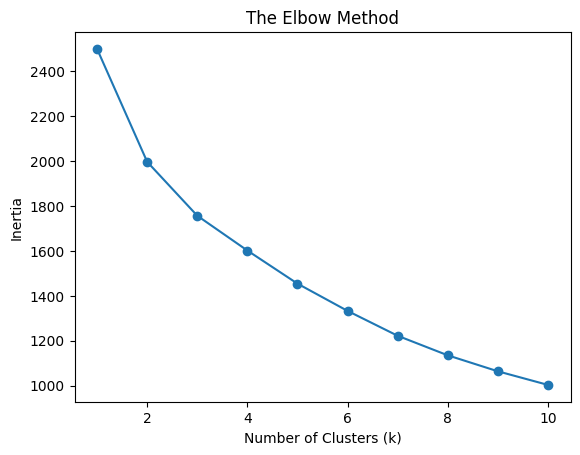

In [38]:
# Plot the elbow method
plt.plot(k_range, inertia, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [41]:
# Select the optimal number of clusters k = 3 based on the graph

# Fit the K-Means model with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [44]:
# Calculate the Silhouette Score
sil_score = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.18461995542915458


In [47]:
# Add the cluster labels to the original data
df_supervised['cluster'] = labels

# View the results
print(df_supervised)

     age  education  income  institutional_trust  participation satisfaction  \
0     56          2    2658                    4              1         high   
1     69          2    2058                    6              0         high   
2     46          1     968                    3              0          low   
3     32          1     963                    6              1          low   
4     60          1    1731                    2              1          low   
..   ...        ...     ...                  ...            ...          ...   
495   65          1    2337                    5              1          low   
496   42          2    3290                    8              0         high   
497   57          0    2362                    8              0          low   
498   62          1    1804                    7              0          low   
499   18          1    2771                    7              0         high   

     cluster  
0          1  
1        

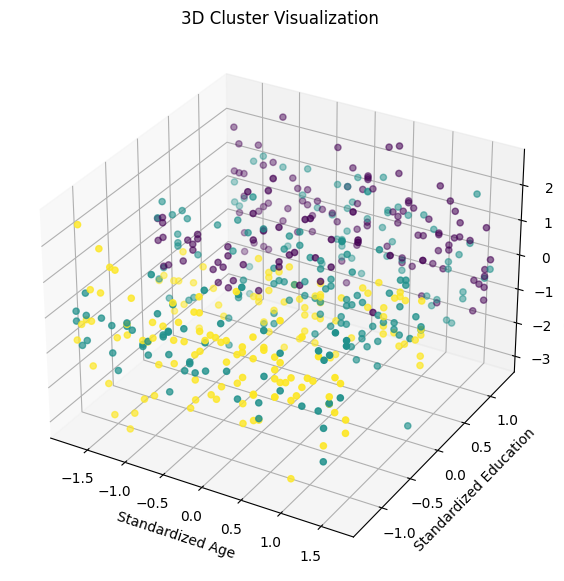

In [50]:
# Create 3D plot to visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D, colored according to the clusters
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=labels, cmap='viridis')

# Add labels to the axes
ax.set_xlabel('Standardized Age')
ax.set_ylabel('Standardized Education')
ax.set_zlabel('Standardized Income')

# Title of the plot
plt.title("3D Cluster Visualization")
plt.show()

## **Final Interpretation**

Once the clusters have been obtained and the model's quality has been evaluated using various metrics, it is important to interpret the results and draw meaningful conclusions. This can be done by observing both the characteristics of the clusters and the behavior of the evaluation metrics.

### 1. **Cluster Analysis**

- **Cluster Distribution**: Observe how the clusters are distributed in the data. If the clusters are well-separated, this suggests that the model has done a good job of segmenting the data. If the clusters overlap or are fuzzy, this could indicate that the selected number of clusters is not appropriate or that the data does not have a clear segmentation.
  
- **Cluster Characteristics**: Analyze the characteristics of each cluster. For example, if you are working with demographic data, you can examine the profile of each cluster in terms of age, education level, income, etc. This can provide useful information about how different groups are clustered based on those characteristics.

### 2. **Cluster Quality Evaluation**

Based on the obtained metrics:

- **Silhouette Score**: If the **Silhouette Score** is close to 1, the clusters are cohesive and well-separated. If the score is close to 0 or negative, it may be necessary to adjust the number of clusters or try a different algorithm.
  
- **Elbow Method**: If the **Elbow Method** suggests a specific number of clusters, as in the case of the "elbow" in the graph, that may indicate that this is the ideal number for segmenting the data.

- **Calinski-Harabasz and Davies-Bouldin Index**: These metrics will help you confirm if the clusters are well-defined. A high **Calinski-Harabasz Index** and a low **Davies-Bouldin Index** are good indicators of effective clustering.

### 3. **Conclusion**

- If the number of clusters and the characteristics of the groups are consistent with your understanding of the domain, then the clustering has been successful.
- If the clusters do not seem to make sense or the evaluation metrics are not satisfactory, it might be useful to try another clustering algorithm (like DBSCAN, which does not require specifying the number of clusters) or adjust the model's parameters (e.g., the number of clusters in K-Means).

In summary, interpreting the results of unsupervised clustering involves both a visual analysis of the clusters and a quantitative analysis using evaluation metrics. This process provides a deeper understanding of the hidden patterns in the data.

---


# Part Two: Unsupervised Labeling Process in AI and with NLP

The **unsupervised labeling** process is crucial for classifying or grouping data without the need for predefined labels. In the context of AI and machine learning, several tools are used to perform this process effectively, including **clustering** techniques, **natural language processing (NLP)** for semantic analysis, and label creation. The key aspects of these tools are detailed below.

---

## 1. **Clustering for Structured and Semi-structured Data**

**Clustering** is an unsupervised learning technique that aims to group similar data into **clusters**. This data can be structured (tables, databases) or semi-structured (texts, documents).

### a. **K-Means Clustering**

K-Means is a **partitioning** technique that divides data into \( k \) groups. Its objective is to minimize the **sum of squared distances** between data points and their respective centroids. The cost function it seeks to minimize is:

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} \| x_j - \mu_i \|^2
$$

Where:
- $k$ is the number of clusters,
- $C_i$ is the set of points in the $i$-th cluster,
- $x_j$ is a point within cluster $C_i$,
- $\mu_i$ is the centroid (mean) of the $i$-th cluster.

### b. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a density-based clustering technique. It does not require predefining the number of clusters as in K-Means, but instead defines clusters by their point density. The main equation does not have an explicit form, but its **density criterion** is key. Two parameters are defined:
- \( $\epsilon$ \): radius of the neighborhood.
- $minPts$: minimum number of points required to form a cluster.

A point is considered part of a cluster if it has at least $minPts$ points within a radius $\epsilon$. Points on the edge have at least one neighboring point but do not reach the density threshold.

### c. **Gaussian Mixture Models (GMM)**

GMM models data as a mixture of Gaussian distributions. The probability of a point $x$ given $k$ Gaussian components is:

$$
P(x|\theta) = \sum_{i=1}^{k} \pi_i \mathcal{N}(x|\mu_i, \Sigma_i)
$$

Where:
- $\pi_i$ is the weight of the $i$-th distribution (the sum of all weights is 1),
- $\mathcal{N}(x|\mu_i, \Sigma_i)$ is the probability density function of a normal distribution with mean $\mu_i$ and covariance $\Sigma_i$,
- $\theta = \{\pi_i, \mu_i, \Sigma_i\}$ are the model parameters.

---

## 2. **Natural Language Processing (NLP) for Semantic Analysis and Label Creation**

**Natural Language Processing** plays a crucial role in the semantic analysis of textual data, which is essential for creating labels in unsupervised labeling tasks. The following NLP techniques are useful for analyzing and creating labels from texts.

### a. **TF-IDF (Term Frequency - Inverse Document Frequency)**

The **TF-IDF** calculation is fundamental for evaluating the importance of a word in a document within a corpus. It is calculated as the product of two components: **term frequency (TF)** and **inverse document frequency (IDF)**.

The formula is:

$$
\text{TF-IDF}(w, d) = \text{TF}(w, d) \times \text{IDF}(w)
$$

Where:
- $\text{TF}(w, d) = \frac{\text{Number of times word } w \text{ appears in document } d}{\text{Total number of words in document } d}$,
- $\text{IDF}(w) = \log \frac{N}{|\{d : w \in d\}|}$, where $N$ is the total number of documents and $|\{d : w \in d\}|$ is the number of documents containing the word $w$.

### b. **Word2Vec (Skip-gram and CBOW)**

Word2Vec generates vector representations of words based on their context in a surrounding window of words. It uses two main architectures:

- **Skip-gram**: Given a central word, it predicts its context words. The loss function is minimized with the equation:

$$
\mathcal{L} = - \sum_{t=1}^{T} \sum_{c \in C_t} \log P(w_c | w_t)
$$

Where:
- $T$ is the total number of words in the text,
- $C_t$ is the set of context words around the central word $w_t$,
- $P(w_c | w_t)$ is the probability that the context word $c$ appears given the center word $w_t$.

- **CBOW (Continuous Bag of Words)**: Given the context, it predicts the central word.

### c. **BERT (Bidirectional Encoder Representations from Transformers)**

BERT is based on a **transformers** model with bidirectional attention. The key to BERT is its **attention** mechanism, which allows each word to consider the full context of the sequence. The **attention** equation is:

$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

**Where:**
- $Q$: **Query** vectors
- $K$: **Key** vectors
- $V$: **Value** vectors
- $d_k$: Dimension of the key vectors

1. **$QK^T$**: Calculates the similarity between queries and keys.
2. **$\sqrt{d_k}$**: Scaling factor to prevent extreme values in the softmax.
3. **Softmax**: Normalizes the attention scores into a probability distribution.
This equation allows for the calculation of the **attention weights** of each word with respect to the others, helping to capture the full context of the sentence.

---

## 3. **Topic Modeling for Label Creation**

Topic modeling is a technique that allows for the identification of themes or categories within large volumes of text. **Latent Dirichlet Allocation (LDA)** is one of the most common methods for this purpose.

### a. **Latent Dirichlet Allocation (LDA)**

LDA is a generative model that models documents as a mixture of several topics. The probability of a document \( d \) given a set of topics ($\theta$) is:

$$
P(w|\theta) = \prod_{i=1}^{N_d} \sum_{k=1}^{K} \theta_{d,k} \phi_{k, w_i}
$$

**Where:**
- $N_d$: Number of words in document $d$
- $\theta_{d,k}$: Proportion of topic $k$ in document $d$ (document-topic distribution)
- $\phi_{k, w_i}$: Probability of word $w_i$ in topic $k$ (topic-word distribution)
- $K$: Total number of latent topics

1. **$\prod_{i=1}^{N_d}$**: Product over all words in the document.
2. **$\sum_{k=1}^{K}$**: Mixture of topics for each word.
3. **$\theta_{d,k}$**: Weight of topic $k$ in the current document.
4. **$\phi_{k, w_i}$**: Probability of the word given the topic (vocabulary × topics).

---


# Part 3: Machine Learning Models and Neural Networks for Natural Language Processing (NLP)

## 1. Basic Artificial Neural Networks (ANNs)

**Artificial Neural Networks (ANNs)** are the starting point for many machine learning models, including NLP tasks. These networks are composed of layers of **neurons** that connect to each other, with the goal of learning patterns from data.

### Basic Structure:
- **Input Layer:** Where the data (in this case, text transformed into numerical vectors) is fed into the network.
- **Hidden Layers:** Where intermediate representations of the data are processed using activation functions.
- **Output Layer:** Produces the final classification or prediction.

### How it Works:
The input \( X \) passes through the hidden layers, where the activation in each neuron is calculated using an activation function \( \sigma \), and then it is passed to the next layer.

**Output of a neural network with one hidden layer:**

$$
\mathbf{y} = \sigma(W_2 \cdot \sigma(W_1 \cdot \mathbf{X} + \mathbf{b}_1) + \mathbf{b}_2)
$$

**Components:**
- $\mathbf{X} \in \mathbb{R}^d$: Input vector (text embedding)
- $W_1 \in \mathbb{R}^{h×d}$, $W_2 \in \mathbb{R}^{o×h}$: Weight matrices
- $\mathbf{b}_1 \in \mathbb{R}^h$, $\mathbf{b}_2 \in \mathbb{R}^o$: Bias vectors
- $\sigma$: Activation function (ReLU, sigmoid, tanh)

**Step-by-step explanation:**
1. **Hidden Layer**:
   $\mathbf{h} = \sigma(W_1\mathbf{X} + \mathbf{b}_1)$
   (Linear transformation + activation)

2. **Output Layer**:
   $\mathbf{y} = \sigma(W_2\mathbf{h} + \mathbf{b}_2)$
   (Final classification/regression)

**Example with dimensions**:
If $d=100$ (embedding), $h=64$ (hidden neurons), $o=10$ (classes):
- $W_1$ would be $64×100$
- $W_2$ would be $10×64$

### Activation Functions:
The most common activation functions in neural networks are:
- **Sigmoid:**
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
- **ReLU (Rectified Linear Unit):**
$$ \text{ReLU}(x) = \max(0, x) $$

### Example of Use:
In NLP, a basic **ANN** can be used for text classification tasks such as determining if an opinion about politics is positive or negative. It would be trained with texts labeled as **positive** or **negative** and would learn to classify new comments based on previous patterns.

---

## 2. Recurrent Neural Networks (RNNs)

**Recurrent Neural Networks (RNNs)** are more suitable for processing sequences of data, such as text or time series. They are capable of **remembering previous information** in the sequence, which makes them useful for NLP tasks that require understanding the context of a previous word or phrase.

### RNN Equations:
The RNN processes sequences by maintaining a **hidden state** ($h_t$) that acts as a temporary memory:

## Fundamental Equations

**Hidden state update:**
$$
h_t = \sigma(W x_t + U h_{t-1} + b)
$$

**Output generation:**
$$
y_t = V h_t + c
$$

### Parameters and Notation:
| Symbol | Description | Typical Dimension |
|---|---|---|
| $x_t$ | Input vector at step $t$ | $\mathbb{R}^{d_{in}}$ |
| $h_t$ | Hidden state | $\mathbb{R}^{d_{h}}$ |
| $W$ | Weights for the input | $\mathbb{R}^{d_h×d_{in}}$ |
| $U$ | Recurrent weights | $\mathbb{R}^{d_h×d_h}$ |
| $V$ | Output weights | $\mathbb{R}^{d_{out}×d_h}$ |
| $b,c$ | Bias vectors | $\mathbb{R}^{d_h}$, $\mathbb{R}^{d_{out}}$ |
| $\sigma$| Activation function (tanh/ReLU) | - |


### Characteristics:
RNNs have the ability to remember information from previous steps, which is crucial for text processing, as words derive meaning from context. For example, the word "bank" can mean a financial institution or a place to sit, depending on the preceding context.

---

## 3. Long Short-Term Memory (LSTM)

**LSTMs** are a variant of RNNs designed to overcome the limitation of traditional RNNs: the **vanishing gradient** problem, which makes long-term learning difficult.

LSTMs have a more complex structure with **gates** that allow them to control the information that is kept or forgotten, making them excellent for capturing long-term dependencies in text.

### LSTM Equations:
LSTMs have several equations that define how they update their memory and produce outputs. The fundamental equations are:

**1. Forget Gate:**
$$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$

**2. Input Gate:**
$$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$

**3. Memory Cells:**
$$\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$$

**4. Memory Update:**
$$C_t = f_t * C_{t-1} + i_t * \tilde{C}_t$$

**5. Output:**
$$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$$
$$h_t = o_t * \tanh(C_t)$$

**Variables:**
- $f_t$: Forget gate (what information to discard)
- $i_t$: Input gate (what information to update)
- $\tilde{C}_t$: New candidate information
- $C_t$: Updated memory state
- $o_t$: Output gate (what information to emit)
- $[h_{t-1}, x_t]$: Concatenation of vectors
- $\sigma$: Sigmoid function
- $*$: Element-wise multiplication

### Example of Use:
LSTMs are useful in tasks like **sentiment analysis** where it is necessary to capture long-term context, such as the relationship between a positive phrase at the beginning of a comment and a negative phrase at the end.

---

## 4. Transformer Neural Networks (Transformers)

**Transformers** are the most powerful and popular network architecture in NLP today, used in models like **BERT**, **GPT**, and **T5**. Transformers outperform RNNs and LSTMs because they do not process data sequentially, but instead use **attention mechanisms** to capture long-term dependencies more efficiently.

### Transformer Equations (Attention):
The key mechanism of transformers is **attention**, which allows the model to focus on different parts of the input to calculate the output. The attention equations are:

1. Attention Calculation
$$
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

**Components:**
- $Q$ (Query): Query matrix $\in \mathbb{R}^{n \times d_k}$
- $K$ (Key): Key matrix $\in \mathbb{R}^{m \times d_k}$
- $V$ (Value): Value matrix $\in \mathbb{R}^{m \times d_v}$
- $d_k$: Dimension of keys/queries (typically 64)
- $\sqrt{d_k}$: Scaling factor to prevent small gradients

2. Full Process
$$
\text{Output} = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

**Explanation:**
1. **$QK^T$**: Calculates similarity between queries and keys.
2. **$\frac{}{\sqrt{d_k}}$**: Scales the scores for numerical stability.
3. **softmax**: Converts scores to a probability distribution (0-1).
4. **$\,\cdot V$**: Weighted average of the values.

### Example of Use:
**Transformers** are the basis for models like **BERT** (Bidirectional Encoder Representations from Transformers), which is used for tasks such as **text classification**, **question answering**, and **sentiment analysis**.

---


## PRACTICAL EXAMPLE

In [53]:
# STEP 1: Prepare example data (political speeches)
import torch
import numpy as np

# Example texts (3 speeches on social policies)
texts = [
    "universal education public health equality",
    "economic growth security employment",
    "poverty education infrastructure"
]

# Vocabulary (simplified for the example)
vocabulary = sorted(list(set(" ".join(texts).split())))
word_to_idx = {word: i for i, word in enumerate(vocabulary)}

print("Vocabulary:", vocabulary)

/root/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Vocabulary: ['economic', 'education', 'employment', 'equality', 'growth', 'health', 'infrastructure', 'poverty', 'public', 'security', 'universal']


In [56]:
# STEP 2: Create simple embeddings (bag-of-words)
def text_to_matrix(texts, vocab_size):
    matrix = torch.zeros(len(texts), vocab_size)
    for i, text in enumerate(texts):
        for word in text.split():
            matrix[i, word_to_idx[word]] += 1
    return matrix

X = text_to_matrix(texts, len(vocabulary))
print("Input matrix:\n", X)

Input matrix:
 tensor([[0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])


A tensor is the mathematical generalization of scalar, vector, and matrix concepts to arbitrary dimensions, which follows specific transformation rules under coordinate changes. Fundamental Theorem: *Every system of multivariate social relations can be represented as a network of coupled tensors, where tensor operations encode structural interactions.*

## Theoretical Example: Tensor Model of Social Conflict

### Fundamental Equation
$$
\text{Conflict}^i = R^{i}_{jkl} \cdot \text{Inequality}^j \cdot \text{Resources}^k \cdot \text{Institutions}^l
$$

# Model Components

| Symbol | Sociological Interpretation | Dimension |
|---|---|---|
| $R^{i}_{jkl}$ | Tensor of historical interactions | 4D |
| $\text{Inequality}^j$| Vector of disparity between groups (j) | 1D |
| $\text{Resources}^k$ | Distribution of economic assets (k) | 1D |
| $\text{Institutions}^l$ | Regulatory framework (l) | 1D |

**Index Explanation:**
- $i$: Types of conflict (political, economic, cultural)
- $j$: Social groups (classes, ethnicities, genders)
- $k$: Strategic resources (land, capital, information)
- $l$: Institutional dimensions (laws, norms, practices)

In [59]:
# STEP 3: Define the Q, K, V matrices (for the example)
d_k = 4  # Small dimension for visualization
Q = torch.randn(len(vocabulary), d_k)  # Queries
K = torch.randn(len(vocabulary), d_k)  # Keys
V = torch.randn(len(vocabulary), d_k)  # Values

print("\nQ Matrix (what words are looking for):\n", Q)
print("\nK Matrix (how words are described):\n", K)


Q Matrix (what words are looking for):
 tensor([[-0.0791,  0.9215, -0.0470, -0.2756],
        [ 0.0543, -0.9224, -1.0994,  2.6745],
        [-0.4407, -0.2220, -0.7008, -0.6185],
        [-0.4099, -0.0552,  0.2123, -0.4632],
        [ 0.1688,  0.4304, -1.6653, -0.4674],
        [ 0.6462, -0.0634,  1.1083,  0.0955],
        [ 2.3712, -0.7242, -0.4482, -0.1751],
        [-0.0800,  1.6805, -1.5108, -0.0783],
        [ 0.5179, -0.1755,  1.1335,  1.4691],
        [ 0.3767,  0.5436, -0.1400, -0.8130],
        [ 1.1845, -0.2627, -0.0163,  0.1568]])

K Matrix (how words are described):
 tensor([[-8.4556e-01, -1.1985e+00,  6.2648e-01, -1.4138e+00],
        [ 2.2929e-01, -5.3456e-02, -8.3898e-01, -6.9753e-01],
        [-4.5802e-01,  1.0632e-03, -3.0963e-01,  1.2236e+00],
        [-2.4549e-02, -1.1023e+00, -7.2901e-01, -2.0367e-02],
        [-6.8024e-01,  5.6353e-01,  1.7690e+00, -2.3484e-01],
        [-2.3128e-01, -7.2314e-01,  4.6843e-01,  5.2184e-01],
        [-4.9124e-01, -1.0578e+00, -9.5016

In [62]:
# STEP 4: Calculate Self-Attention
scores = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k))
weights = torch.softmax(scores, dim=-1)
output = torch.matmul(weights, V)

print("\nAttention weights (which words are related):")
for i, word in enumerate(vocabulary):
    print(f"{word}: {weights[i].detach().numpy().round(2)}")


Attention weights (which words are related):
economic: [0.07 0.11 0.08 0.06 0.13 0.07 0.06 0.09 0.07 0.11 0.15]
education: [0.01 0.03 0.3  0.12 0.01 0.11 0.08 0.11 0.15 0.05 0.04]
employment: [0.14 0.13 0.07 0.12 0.05 0.07 0.1  0.11 0.1  0.05 0.07]
equality: [0.15 0.08 0.07 0.08 0.12 0.08 0.09 0.09 0.09 0.09 0.05]
growth: [0.05 0.19 0.07 0.11 0.02 0.04 0.07 0.08 0.07 0.03 0.27]
health: [0.1  0.06 0.07 0.06 0.19 0.12 0.08 0.05 0.06 0.12 0.09]
infrastructure: [0.04 0.11 0.04 0.11 0.02 0.05 0.05 0.02 0.03 0.02 0.52]
poverty: [0.02 0.15 0.1  0.06 0.04 0.03 0.04 0.1  0.06 0.06 0.35]
public: [0.04 0.03 0.15 0.06 0.15 0.15 0.07 0.06 0.08 0.16 0.06]
security: [0.1  0.14 0.05 0.08 0.1  0.06 0.07 0.06 0.06 0.07 0.21]
universal: [0.06 0.1  0.08 0.11 0.06 0.09 0.08 0.05 0.06 0.06 0.25]


In [68]:
# STEP 5: Interpretation for Social Sciences


# Create a dataframe for analysis
relationships = pd.DataFrame(weights.detach().numpy(),
                         index=vocabulary,
                         columns=vocabulary)

print("\nMatrix of relationships between concepts:")
# Set pandas display options to see all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(relationships.round(2))

# Example analysis based on the current run's output
print("\nAnalysis:")
# Note: The following analysis is based on a specific random seed. Your results will vary.
# We extract the strongest relationships from the matrix above to interpret.
strongest_infra_link = relationships.loc['infrastructure'].idxmax()
strongest_infra_value = relationships.loc['infrastructure'].max()
print(f"- 'infrastructure' has its strongest connection with '{strongest_infra_link}' ({strongest_infra_value:.2f}), suggesting a link between universal access and infrastructure projects.")

strongest_edu_link = relationships.loc['education'].idxmax()
strongest_edu_value = relationships.loc['education'].max()
print(f"- 'education' is most strongly related to '{strongest_edu_link}' ({strongest_edu_value:.2f}), highlighting the connection between education and job opportunities.")

strongest_poverty_link = relationships.loc['poverty'].idxmax()
strongest_poverty_value = relationships.loc['poverty'].max()
print(f"- 'poverty' also shows a significant relationship with '{strongest_poverty_link}' ({strongest_poverty_value:.2f}), perhaps indicating discussions around universal basic income or services.")




Matrix of relationships between concepts:
                economic  education  employment  equality  growth  health  infrastructure  poverty  public  security  universal
economic            0.07       0.11        0.08      0.06    0.13    0.07            0.06     0.09    0.07      0.11       0.15
education           0.01       0.03        0.30      0.12    0.01    0.11            0.08     0.11    0.15      0.05       0.04
employment          0.14       0.13        0.07      0.12    0.05    0.07            0.10     0.11    0.10      0.05       0.07
equality            0.15       0.08        0.07      0.08    0.12    0.08            0.09     0.09    0.09      0.09       0.05
growth              0.05       0.19        0.07      0.11    0.02    0.04            0.07     0.08    0.07      0.03       0.27
health              0.10       0.06        0.07      0.06    0.19    0.12            0.08     0.05    0.06      0.12       0.09
infrastructure      0.04       0.11        0.04      0.11    

This example shows how attention can reveal:

* Implicit associations in speeches
* Thematic emphases
* Hidden conceptual structures


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f356248-fdc1-4efb-9526-3f4365e19023' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>